# CME 193 - Pandas Exercise Supplement

In this extended exercise, you'll load and play with CO2 data collected at the Mauna Loa observatory over the last 60 years. 

* NOAA Website: https://www.esrl.noaa.gov/gmd/ccgg/trends/full.html
* NOAA data: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

The monthly data can be found at this [link](ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt)

In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

Reads the data from the ftp server directly.

In [86]:
df = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', 
                   delim_whitespace=True, 
                   comment='#',
                   names=["year", "month", "decdate", "co2", "co2interp", "trend", "days"],
                   index_col=False)

In [87]:
pd.set_option('display.max_rows', 10)
df

,year,month,decdate,co2,co2interp,trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...,...
740,2019,11,2019.875,410.27,410.27,412.27,25
741,2019,12,2019.958,411.76,411.76,412.44,31
742,2020,1,2020.042,413.40,413.40,413.08,29
743,2020,2,2020.125,414.11,414.11,413.26,28


In [88]:
# copies the original data.
orig = df.copy()

## Part 1 - Normalize the Date

1. create a new column for the dataframe called 'day' that is set to be 1 in every entry

In [89]:
orig['day']=1
orig

,year,month,decdate,co2,co2interp,trend,days,day
0,1958,3,1958.208,315.71,315.71,314.62,-1,1
1,1958,4,1958.292,317.45,317.45,315.29,-1,1
2,1958,5,1958.375,317.50,317.50,314.71,-1,1
3,1958,6,1958.458,-99.99,317.10,314.85,-1,1
4,1958,7,1958.542,315.86,315.86,314.98,-1,1
...,...,...,...,...,...,...,...,...
740,2019,11,2019.875,410.27,410.27,412.27,25,1
741,2019,12,2019.958,411.76,411.76,412.44,31,1
742,2020,1,2020.042,413.40,413.40,413.08,29,1
743,2020,2,2020.125,414.11,414.11,413.26,28,1


2. The dataframe now has columns for 'day', 'month', and 'year'.  Use `pd.to_datetime()` to create a new series of dates 

`dates = pd.to_datetime(...)`

In [90]:
dates = pd.to_datetime(orig[['day','month','year']])
dates

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
740   2019-11-01
741   2019-12-01
742   2020-01-01
743   2020-02-01
744   2020-03-01
Length: 745, dtype: datetime64[ns]

3. set a new column of the dataframe to hold this series.  Call the column `'date'`

In [91]:
orig['date']=dates

4. set the index of the dataframe to be the `'date'` column using the `set_index()` method.

In [92]:
orig.set_index("date",inplace=True)

5. Now let's remove the old columns with date information.  Use the `drop()` method to remove the 'day', 'month', 'year', and 'decdate' columns.  Hint: `df.drop(..., axis=1, inplace=True)`

5a. Go ahead and drop the 'days' column as well, since we're not going to use it.

In [93]:
orig.drop(['day','month','year'], axis=1, inplace=True)
orig

,decdate,co2,co2interp,trend,days
date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,-99.99,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...
2019-11-01,2019.875,410.27,410.27,412.27,25
2019-12-01,2019.958,411.76,411.76,412.44,31
2020-01-01,2020.042,413.40,413.40,413.08,29


## Part 2 - deal with missing values

1. First, use the `plot()` method to visualize the contents of your dataframe.  What do you see?

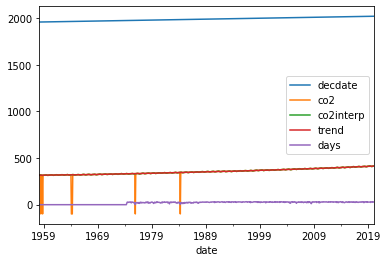

In [95]:
orig.plot()
# help(orig.plot)

if you read the header for the file we used to load the dataframe, you'll see that missing values take the value -99.99.

2. Set values that are `-99.99` to `None` (this indicates a missing value in Pandas).

Hint: use the `applymap()` method, and the lambda function
```python
lambda x: None if x == -99.99 else x
```
If you're familiar with [ternary operators](https://en.wikipedia.org/wiki/%3F:), this is the equivalent of
```
x == -99.99 ? None : x
```
Note that you may need to make a new assignment e.g., `df = df.applymap(...)`

In [96]:
orig=orig.applymap(lambda x: None if x == -99.99 else x)

3. Plot your dataframe again.  What do you see now?

3a. Try plotting just the 'co2' series.  What do you see?

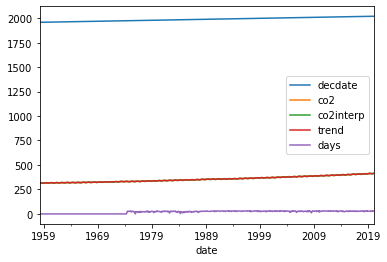

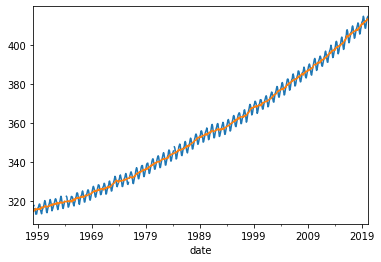

In [97]:
orig.plot()
plt.figure()
orig.co2.plot()
orig.trend.plot()

## Part 3 - Create New DataFrames with rows that meet conditions

1. Create new dataframe called `recent` that contains all rows of the previous dataframe since 2007.  Plot it.

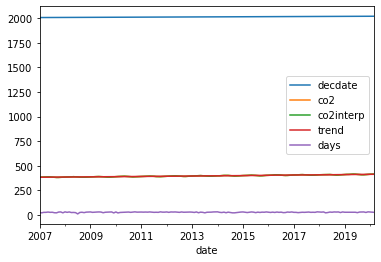

In [102]:
recent=orig.loc['2007-01-01':]
# recent=recent[:3]
recent.plot()

2. Create a new dataframe called `old` that contains all rows of the dataframe before 1990.  Plot it.

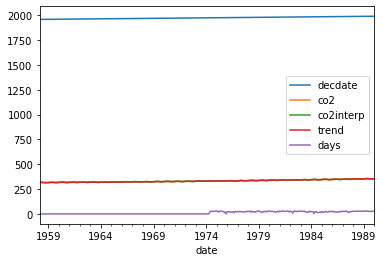

In [103]:
old=orig.loc[:'1990-01-01']
old.plot()

##### At this point, by inspection, you might be convinced there is further analysis to be done

In [104]:
np.var(old['trend']), np.var(recent['trend'])

(129.50944927022476, 79.90540619437522)

## Part 4 - Create some groups

Let's go back to the original data that we loaded

In [105]:
df

,year,month,decdate,co2,co2interp,trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...,...
740,2019,11,2019.875,410.27,410.27,412.27,25
741,2019,12,2019.958,411.76,411.76,412.44,31
742,2020,1,2020.042,413.40,413.40,413.08,29
743,2020,2,2020.125,414.11,414.11,413.26,28


Suppose that we want to look at co2 averages by year instead of by month.

1. drop rows with missing values

1a. apply the map that sends -99.99 to none

1b. use the `dropna()` method to remove rows with missing values: `df = df.dropna()`

In [106]:
df=df.applymap(lambda x: None if x == -99.99 else x)
df.dropna(inplace=True)

2. Create a group for each year (use key 'year')

3. Aggregate the groups into a new dataframe, `df2`, using `np.mean`

3a. you can drop all the columns except `'co2'` if you'd like

In [107]:
df2=df.groupby('year').co2.mean()

4. make a plot of the `'co2'` series

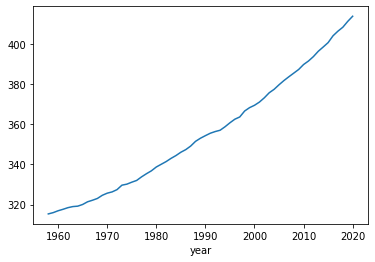

In [84]:
df2.plot()